<a href="https://colab.research.google.com/github/saptarshidatta96/MTech_Sem3/blob/main/nlp_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
from google.colab import drive
import random
import numpy as np
import pandas as pd
import gzip
import nltk
from nltk import *
from nltk.corpus import webtext, stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
import textblob
from textblob import TextBlob
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [220]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [221]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF("/content/gdrive/MyDrive/reviews_Apps_for_Android_5.json.gz")

In [222]:
df.shape

(752937, 9)

In [ ]:
df = df.sample(n=25000)

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
223820,AR076Y7XSB4IQ,B0079PXROU,Amazon Customer,"[1, 1]",My battery is on it's last leg and this app le...,4.0,Good app,1346803200,"09 5, 2012"
597735,A2QBNEH99GPVOZ,B00D0VZLVE,squishy,"[0, 0]",ReAlly good gameplay and an actual brainbuster...,5.0,no too bad,1376524800,"08 15, 2013"
11142,A312B49Z5RWU8S,B004HE5TAG,NaN,"[0, 2]",Dealer wins too often. Its not realistic compa...,2.0,Not realistic,1327968000,"01 31, 2012"
515258,A3E1JR342DP0HP,B00B4VI8MQ,MT Gipsy,"[0, 0]",This was a fun game with lots of HO's and puzz...,4.0,Fun Game,1398038400,"04 21, 2014"
674845,A24QBQXG56CNIW,B00FEJ3AXQ,"Mary Coburn ""Shopper Girl""","[2, 2]",My kids love love love this! They both love pl...,5.0,My kids are crazy for this,1389744000,"01 15, 2014"


In [ ]:
def preprocessing(text):
  text = re.sub("[^-9A-Za-z ]", "", text).lower()
  stop = stopwords.words("english")
  tokens = [word for word in (token for token in word_tokenize(text)) if word not in stop]
  #preprocessed_text = ' '.join([word for word in tokens])
  lmtzr = nltk.WordNetLemmatizer()
  preprocessed_text = ' '.join([lmtzr.lemmatize(word) for word in tokens])
  return preprocessed_text

In [ ]:
df['reviewText'] = df['reviewText'].astype(str)
df['reviewText'] = df['reviewText'].apply(preprocessing)

In [ ]:
text = list(df['reviewText'])

In [ ]:
print(text[0:30])

['battery last leg app let know long panic', 'really good gameplay actual brainbuster really challenging tricky find answer youll feel small lol', 'dealer win often realistic compared playing actual casino looking game play fun device training play real life im somewhat dissappointed nice graphic though work well kindle fire', 'fun game lot ho puzzle problem kindle fire hdx blue screening occasion would rated star', 'kid love love love love playing game yr old help yr old play furby problem furby boom wave sent back kind flaw kept shutting hope replacement work kid excited play furby', 'come knew going say didnt much like pandora slacker radio thing special little app great selection station', 'hat game shut kindle fire several time kindle fire get app unless want shut kindle fire multiple time', 'ive looking fun app think found one thought app fun recommend everyone', 'app quite time challenging game handy game kill time need', 'game fun easier candy crush still challenging life regen

In [ ]:
words = [i for item in text for i in item.split()]

In [ ]:
print(words[:10])

['battery', 'last', 'leg', 'app', 'let', 'know', 'long', 'panic', 'really', 'good']


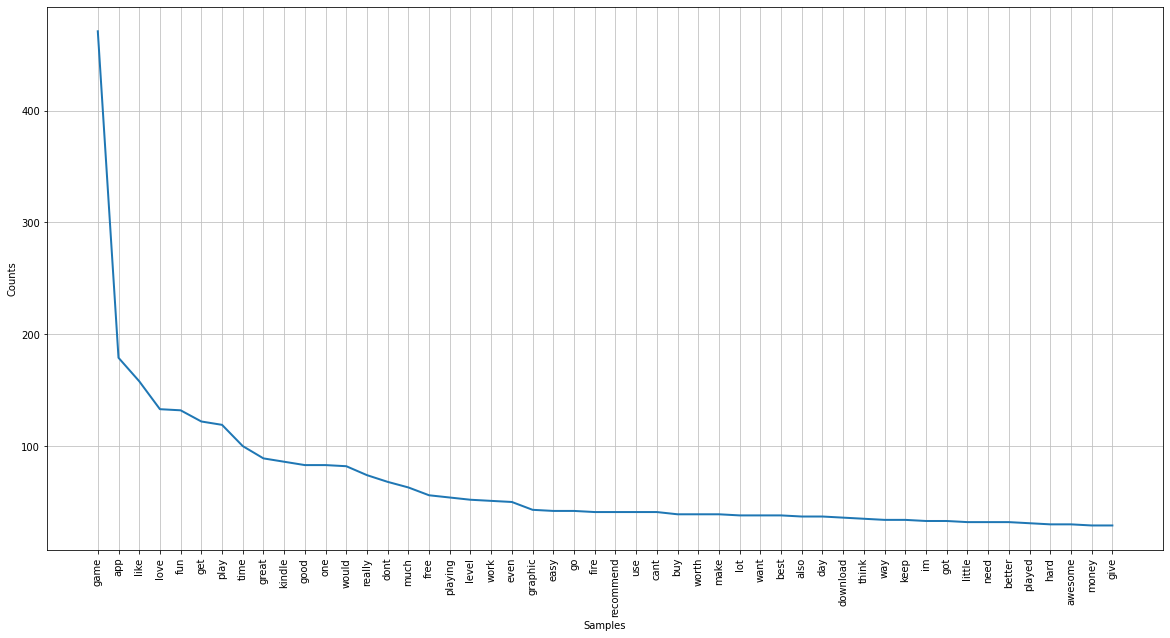

In [ ]:
plt.figure(figsize=(20, 10)) 
nlp_words = nltk.FreqDist(words)
nlp_words.plot(50)

In [ ]:
esBigrams = ngrams(words, 3)
esBigramFreq = collections.Counter(esBigrams)

In [ ]:
esBigramFreq.most_common(10)

[(('kindle', 'fire', 'hd'), 5),
 (('free', 'app', 'day'), 5),
 (('way', 'pas', 'time'), 4),
 (('best', 'game', 'ever'), 4),
 (('game', 'really', 'fun'), 4),
 (('oh', 'oh', 'oh'), 4),
 (('hidden', 'object', 'game'), 3),
 (('would', 'definitely', 'recommend'), 3),
 (('best', 'app', 'ever'), 3),
 (('got', 'free', 'app'), 3)]

In [ ]:
df['tokenized_review'] = df.apply(lambda i:  nltk.word_tokenize(i['reviewText']), axis=1)
df['POS_Tags'] = df.apply(lambda i: nltk.pos_tag(i['tokenized_review']), axis=1)

In [ ]:
def adjectives(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag == 'JJ']
def verbs(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('VB')]
def adverbs(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('RB')]
def nouns(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('NN')]

In [ ]:
df['Adjectives'] = df['reviewText'].apply(adjectives)
df['Verbs'] = df['reviewText'].apply(verbs)
df['Adverbs'] = df['reviewText'].apply(adverbs)
df['Nouns'] = df['reviewText'].apply(nouns)

In [ ]:
df.head(1)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,tokenized_review,POS_Tags,Adjectives,Verbs,Adverbs,Nouns
223820,AR076Y7XSB4IQ,B0079PXROU,Amazon Customer,"[1, 1]",battery last leg app let know long panic,4.0,Good app,1346803200,"09 5, 2012","[battery, last, leg, app, let, know, long, panic]","[(battery, NN), (last, JJ), (leg, NN), (app, V...","[last, panic]","[app, know]",[long],"[battery, leg, let]"


In [ ]:
def POS_freq(words):
  POS = list(words)
  POS = [y for x in POS for y in x]
  plt.figure(figsize=(20, 10)) 
  nlp_words = nltk.FreqDist(POS)
  nlp_words.plot(50)

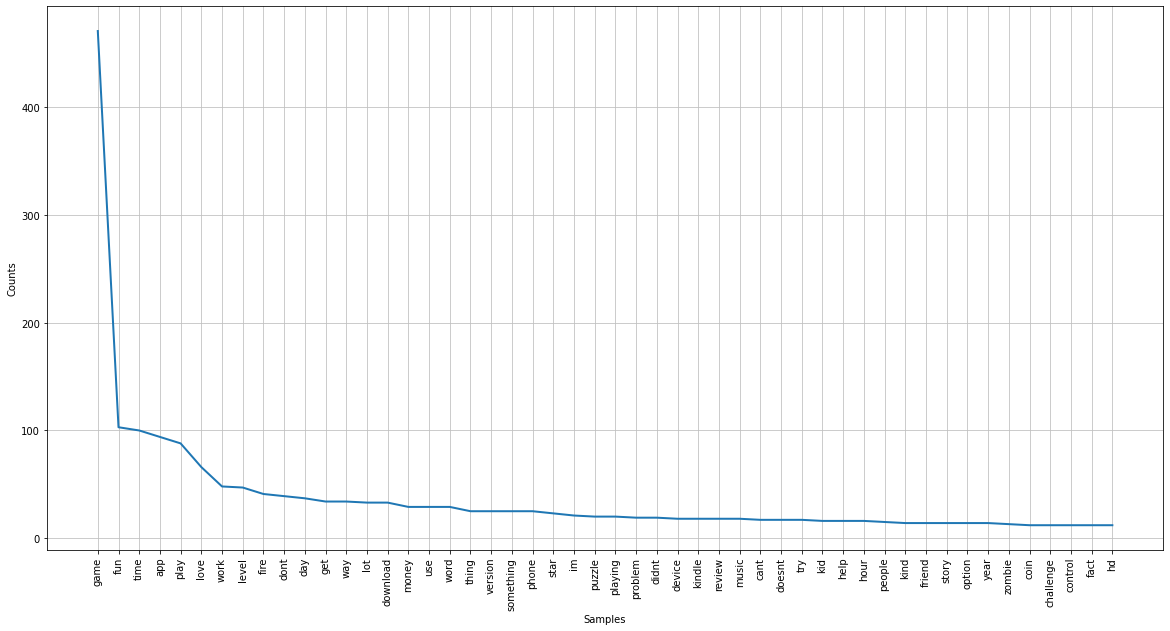

In [ ]:
POS_freq(df['Nouns'])

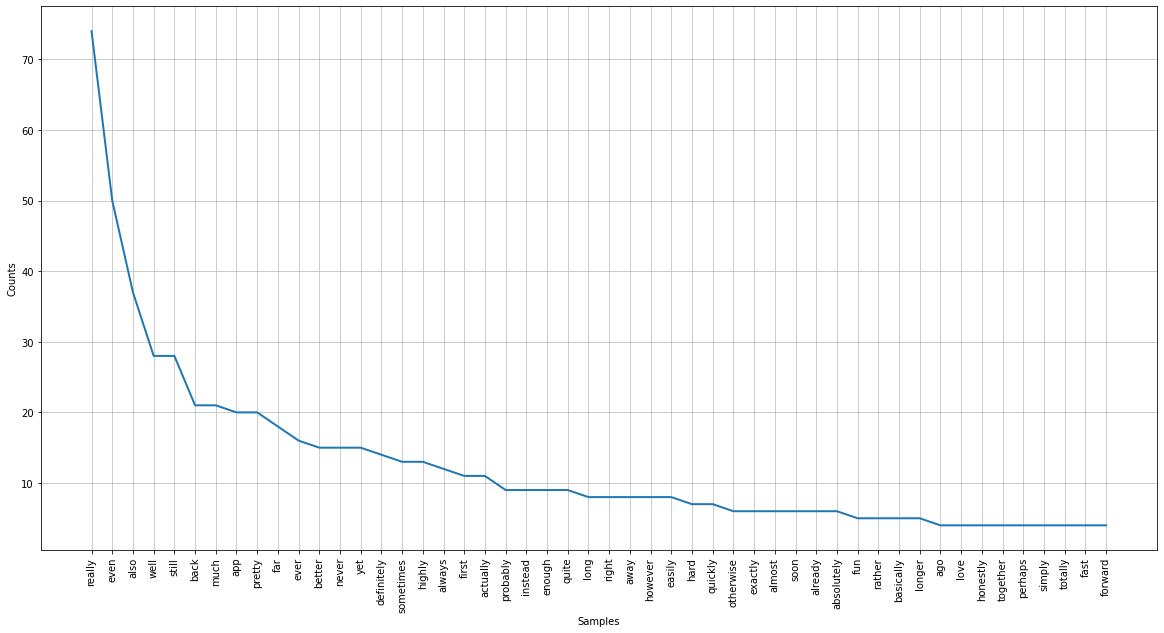

In [ ]:
POS_freq(df['Adverbs'])

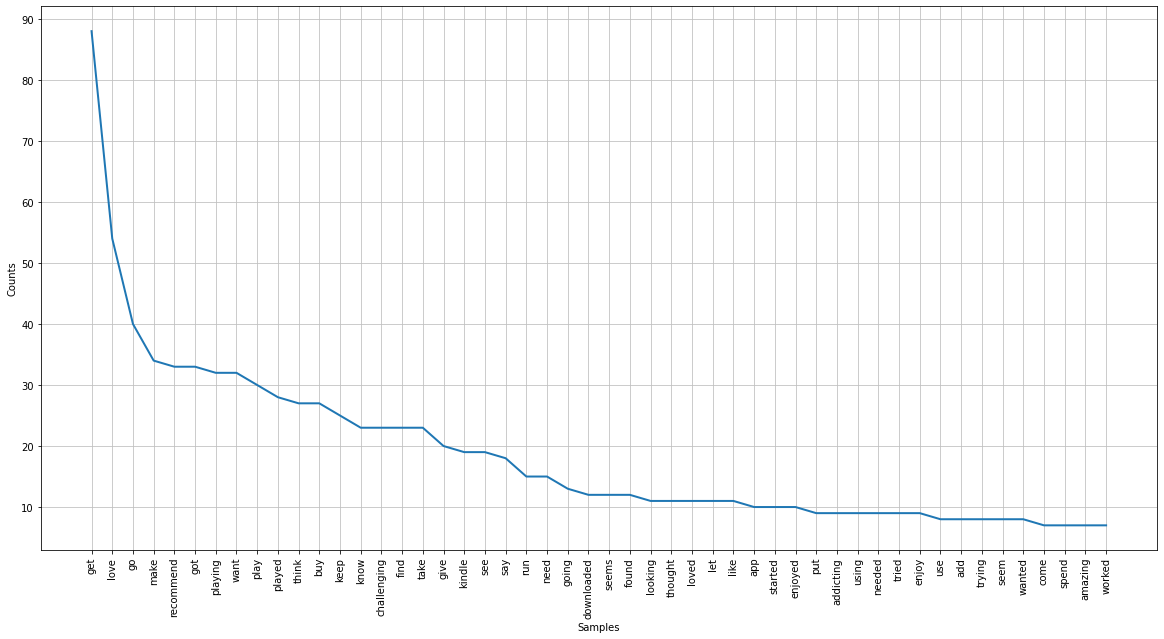

In [ ]:
POS_freq(df['Verbs'])

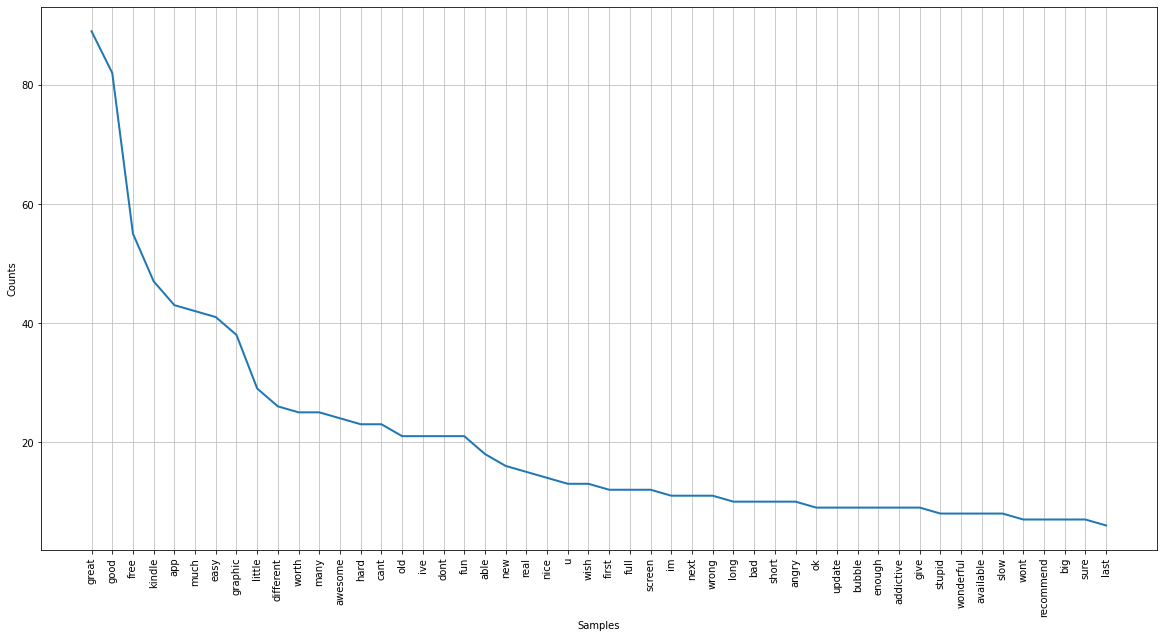

In [ ]:
POS_freq(df['Adjectives'])

In [218]:
NER = spacy.load("en_core_web_sm")

In [ ]:
named_entities = []
for sentence in text:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = NER(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [ ]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:100]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
Entity Name,app,one,first,99,two,year,hour,one day,today,amazon,five,three,bingo,second,bingo,god,christian,9,app day,u,yr,hint,99 cent,year old,number minute,instagram,evening,day,every hour,every day,elis,english,el park,dzz ddfv f moll,day night,daymy year old,depp - taylor,facenook leader board,funi,fifteen minute,...,cvbn zxcv,app,app minecraft,app lot,app like marker board,app kindle,app keyboard,app great age group,app force,android,couple hour,anand,american,amazon appstore,alwaysgo,alabama,9 year old,9 month,app physics,app school,app shuts,app star,coin dozer,coin,christmas year,chicago,cankill,bought card,bler,bingo friend,bell whistle,awesomeit,awesome app,asus,appif u enjoy funnysillya,app stupid,app state,ho puzzle,zodiac sign moon,hundred
Entity Type,ORG,CARDINAL,ORDINAL,CARDINAL,CARDINAL,DATE,TIME,DATE,DATE,ORG,CARDINAL,CARDINAL,GPE,ORDINAL,PERSON,PERSON,NORP,CARDINAL,DATE,ORG,ORG,ORG,MONEY,DATE,TIME,NORP,TIME,DATE,TIME,DATE,PERSON,LANGUAGE,FAC,PERSON,TIME,DATE,PERSON,ORG,PERSON,TIME,...,PERSON,PERSON,PERSON,PERSON,ORG,PERSON,PERSON,ORG,ORG,ORG,TIME,PERSON,NORP,ORG,PERSON,PERSON,DATE,DATE,ORG,ORG,PERSON,ORG,ORG,ORG,DATE,GPE,NORP,PERSON,ORG,PERSON,PERSON,ORG,PERSON,ORG,PERSON,PERSON,ORG,GPE,PERSON,CARDINAL
Frequency,58,54,15,9,6,5,5,4,4,4,4,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [216]:
def key_words(n):

  kwargs = {
            'ngram_range': (1, 2), 
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word', 
            'min_df': 2,
    }
  vectorizer = TfidfVectorizer(**kwargs)
  tfidf_matrix = vectorizer.fit_transform(df['reviewText'])
  important_words_indices = np.argsort(np.asarray(tfidf_matrix.sum(axis=0))[0])[::-1]
  tfidf_feature_names = np.array(vectorizer.get_feature_names())
  print(tfidf_feature_names[important_words_indices[:n]])
  importance = np.asarray(tfidf_matrix.sum(axis=0))[0]
  plt.figure(figsize=(20, 10))
  plt.plot(tfidf_feature_names[important_words_indices[:n]], importance[important_words_indices[:n]])
  plt.xticks(rotation = 45)
  plt.xlabel("Key Words")
  plt.ylabel("Importance")
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['game' 'app' 'like' 'fun' 'love' 'get' 'play' 'time' 'great' 'good'
 'kindle' 'would' 'really' 'one' 'dont' 'much' 'playing' 'free' 'work'
 'level' 'even' 'easy' 'recommend' 'go' 'graphic' 'cant' 'fire' 'use'
 'buy' 'make']


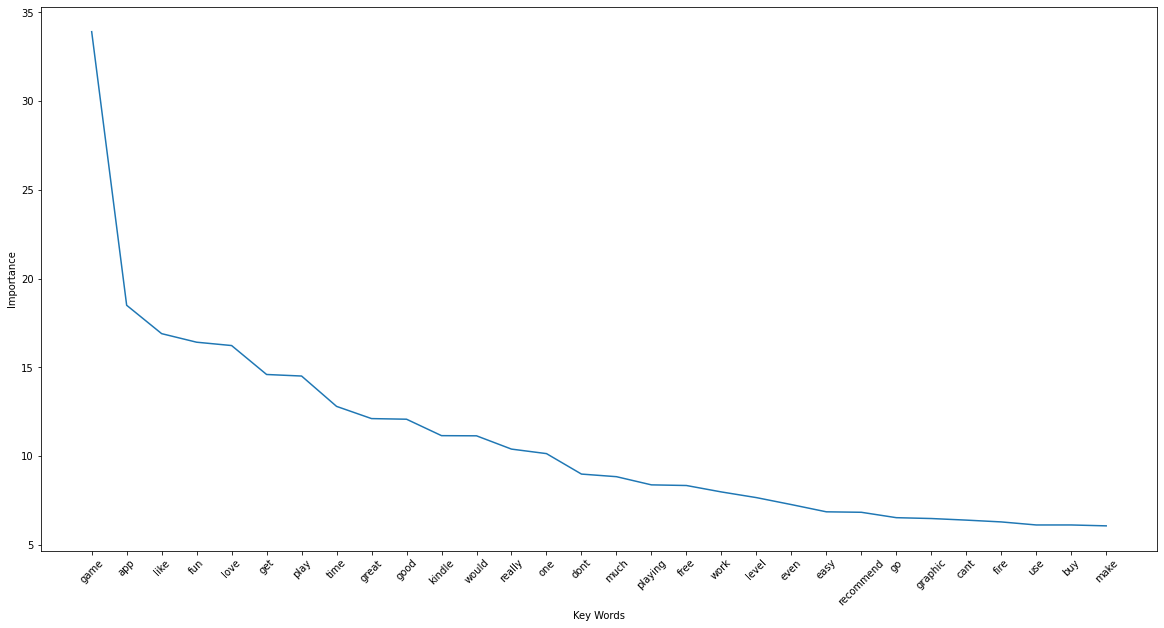

In [217]:
key_words(30)